In [ ]:
import pandas as pd
df=pd.read_csv("/content/cancer patient data sets.csv")
print(df)

     index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk

In [ ]:
print(df.columns)

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values
# For demonstration, let's fill missing values in categorical columns with the mode
categorical_columns = ['Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
                       'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
                       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss',
                       'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails']
for column in categorical_columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)


index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [ ]:
# Convert categorical variables into numerical format using one-hot encoding
df = pd.get_dummies(df, columns=categorical_columns)


In [ ]:
# Splitting the dataset into features and target variable
X = df.drop(columns=['index', 'Patient Id', 'Level'])  # Features
y = df['Level']  # Target variable

# Display the preprocessed dataset
print(X.head())
print(y.head())

   Age  Frequent Cold  Dry Cough  Snoring  Gender_1  Gender_2  \
0   33              2          3        4      True     False   
1   17              1          7        2      True     False   
2   35              6          7        2      True     False   
3   37              6          7        5      True     False   
4   46              4          2        3      True     False   

   Air Pollution_1  Air Pollution_2  Air Pollution_3  Air Pollution_4  ...  \
0            False             True            False            False  ...   
1            False            False             True            False  ...   
2            False            False            False             True  ...   
3            False            False            False            False  ...   
4            False            False            False            False  ...   

   Swallowing Difficulty_8  Clubbing of Finger Nails_1  \
0                    False                        True   
1                    Fal

calculating the risk scores


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculate information gain
# For classification tasks
mutual_info = mutual_info_classif(X, y, discrete_features='auto')

# Calculate mutual information
# For classification tasks
mutual_info_score = mutual_info_classif(X, y, discrete_features='auto')


In [ ]:
# Calculate information gain
# For classification tasks
mutual_info = mutual_info_classif(X, y, discrete_features='auto')

# Calculate mutual information
# For classification tasks
mutual_info_score = mutual_info_classif(X, y, discrete_features='auto')

In [ ]:
# Assign scores based on the calculated metrics
information_gain_scores = {feature: score for feature, score in zip(X.columns, mutual_info)}
mutual_information_scores = {feature: score for feature, score in zip(X.columns, mutual_info_score)}

# Sort the feature scores in descending order
information_gain_scores = dict(sorted(information_gain_scores.items(), key=lambda x: x[1], reverse=True))
mutual_information_scores = dict(sorted(mutual_information_scores.items(), key=lambda x: x[1], reverse=True))



In [ ]:
# Display the scores for Information Gain and Mutual Information
print("Information Gain Scores:")
for feature, score in information_gain_scores.items():
    print(f"{feature}: {score}")

print("\nMutual Information Scores:")
for feature, score in mutual_information_scores.items():
    print(f"{feature}: {score}")

Information Gain Scores:
Obesity_7: 0.42075283113806083
Chest Pain_7: 0.31657175146783945
Dust Allergy_7: 0.29540860715959627
Wheezing_5: 0.24449318231025385
Passive Smoker_7: 0.21687865227165504
OccuPational Hazards_7: 0.2026124493187209
Balanced Diet_7: 0.18558621624151428
Smoking_7: 0.17893076356954452
Air Pollution_6: 0.17279509301936913
Alcohol use_7: 0.16770937710179679
Frequent Cold: 0.1633322653208964
Fatigue_8: 0.14678071671333903
Passive Smoker_2: 0.14528496030360372
Alcohol use_2: 0.1347470796031025
Coughing of Blood_2: 0.13121956727855877
Genetic Risk_2: 0.13114463811533383
Coughing of Blood_8: 0.1294613763513104
Passive Smoker_8: 0.12686775538233408
Shortness of Breath_6: 0.12479174004938631
Genetic Risk_7: 0.1239646299954218
Balanced Diet_2: 0.12349811361527685
Dry Cough: 0.12340327755126013
Coughing of Blood_4: 0.12265922067907109
Air Pollution_3: 0.12135938990231154
chronic Lung Disease_6: 0.11773234145886269
Shortness of Breath_1: 0.11552142669934362
Coughing of Blood_

In [ ]:
import numpy as np

In [ ]:
pip install matplotlib

In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Load your dataset
data = pd.read_csv('/content/cancer patient data sets.csv')

# Drop non-predictive features like 'index', 'Patient Id'
X = data.drop(['index', 'Patient Id', 'Level'], axis=1)
y = data['Level']

# Calculate information gain
# For classification tasks
mutual_info = mutual_info_classif(X, y, discrete_features='auto')

# Calculate mutual information
# For classification tasks
mutual_info_score = mutual_info_classif(X, y, discrete_features='auto')

# Assign scores based on the calculated metrics
information_gain_scores = {feature: score for feature, score in zip(X.columns, mutual_info)}
mutual_information_scores = {feature: score for feature, score in zip(X.columns, mutual_info_score)}

# Sort the feature scores in descending order
information_gain_scores = dict(sorted(information_gain_scores.items(), key=lambda x: x[1], reverse=True))
mutual_information_scores = dict(sorted(mutual_information_scores.items(), key=lambda x: x[1], reverse=True))

# Display the scores for Information Gain and Mutual Information
print("Information Gain Scores:")
for feature, score in information_gain_scores.items():
    print(f"{feature}: {score}")

print("\nMutual Information Scores:")
for feature, score in mutual_information_scores.items():
    print(f"{feature}: {score}")

Information Gain Scores:
Obesity: 0.5209477363622177
Passive Smoker: 0.4951515956916006
Coughing of Blood: 0.4830059640771329
Dust Allergy: 0.3877984684876785
Genetic Risk: 0.37458908851528516
Balanced Diet: 0.35654274806532427
Wheezing: 0.34736015468372616
OccuPational Hazards: 0.3386668598205813
Alcohol use: 0.3288795011877794
Chest Pain: 0.29858080831770284
chronic Lung Disease: 0.2872798459487118
Air Pollution: 0.2735891831473456
Fatigue: 0.26251715153559885
Smoking: 0.20443736604751983
Shortness of Breath: 0.18940246213288603
Frequent Cold: 0.1477912843290401
Dry Cough: 0.14668903736055294
Snoring: 0.13249802726742144
Clubbing of Finger Nails: 0.12557362576212472
Weight Loss: 0.10008563141828031
Swallowing Difficulty: 0.08921920600744215
Gender: 0.04571861239536168
Age: 0.027410370772776416

Mutual Information Scores:
Obesity: 0.508927271840899
Passive Smoker: 0.5003326726353663
Coughing of Blood: 0.4755516257167598
Dust Allergy: 0.3738129763829223
Genetic Risk: 0.356098890119235


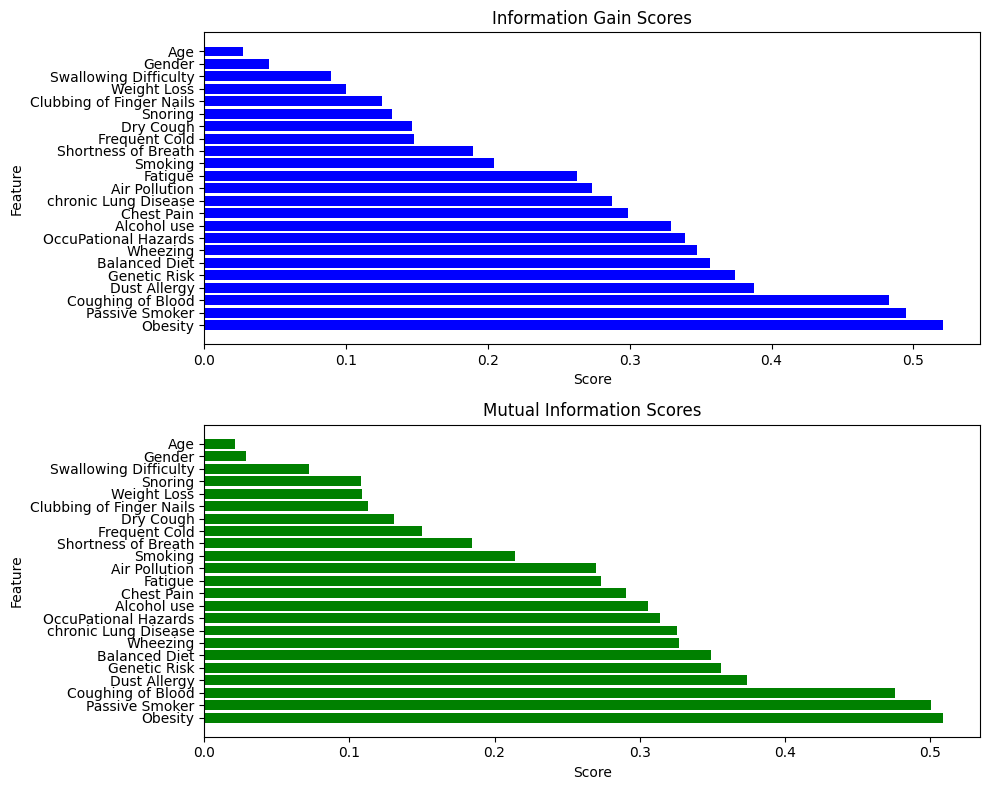

In [ ]:
import matplotlib.pyplot as plt

# Extract feature names and scores from dictionaries
ig_features, ig_scores = zip(*information_gain_scores.items())
mi_features, mi_scores = zip(*mutual_information_scores.items())

# Create subplots for Information Gain and Mutual Information scores
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar plot for Information Gain scores
axes[0].barh(ig_features, ig_scores, color='blue')
axes[0].set_title('Information Gain Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Feature')

# Bar plot for Mutual Information scores
axes[1].barh(mi_features, mi_scores, color='green')
axes[1].set_title('Mutual Information Scores')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Feature')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Create subsets of Environmental and Physical Factors
environmental_subset = data[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Frequent Cold', 'Dry Cough', 'Snoring']]
physical_subset = data[['chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Genetic Risk', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails']]

In [ ]:
# Calculate Information Gain for features in each subset
environmental_info_gain = mutual_info_classif(environmental_subset, data['Level'], discrete_features='auto')
physical_info_gain = mutual_info_classif(physical_subset, data['Level'], discrete_features='auto')# Get the indices of top k features with the highest Information Gain
top_k_features = 4  # Number of top features to select
top_environmental_features = environmental_subset.columns[np.argsort(-environmental_info_gain)[:top_k_features]]
top_physical_features = physical_subset.columns[np.argsort(-physical_info_gain)[:top_k_features]]

In [ ]:
print(top_environmental_features)

Index(['Dust Allergy', 'OccuPational Hazards', 'Alcohol use', 'Air Pollution'], dtype='object')


In [ ]:
print(top_physical_features)

Index(['Obesity', 'Passive Smoker', 'Coughing of Blood', 'Genetic Risk'], dtype='object')


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Calculate Information Gain for features in each subset
environmental_info_gain = mutual_info_classif(environmental_subset, data['Level'], discrete_features='auto')
physical_info_gain = mutual_info_classif(physical_subset, data['Level'], discrete_features='auto')

# Select top k features using SelectKBest for both subsets
top_k_features = 4

# SelectKBest for environmental subset
kbest_environmental = SelectKBest(mutual_info_classif, k=top_k_features)
X_environmental_selected = kbest_environmental.fit_transform(environmental_subset, data['Level'])
selected_environmental_features = environmental_subset.columns[kbest_environmental.get_support(indices=True)]

# SelectKBest for physical subset
kbest_physical = SelectKBest(mutual_info_classif, k=top_k_features)
X_physical_selected = kbest_physical.fit_transform(physical_subset, data['Level'])
selected_physical_features = physical_subset.columns[kbest_physical.get_support(indices=True)]

print("Selected Environmental Features:", selected_environmental_features)
print("Selected Physical Features:", selected_physical_features)


Selected Environmental Features: Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards'], dtype='object')
Selected Physical Features: Index(['Obesity', 'Genetic Risk', 'Passive Smoker', 'Coughing of Blood'], dtype='object')


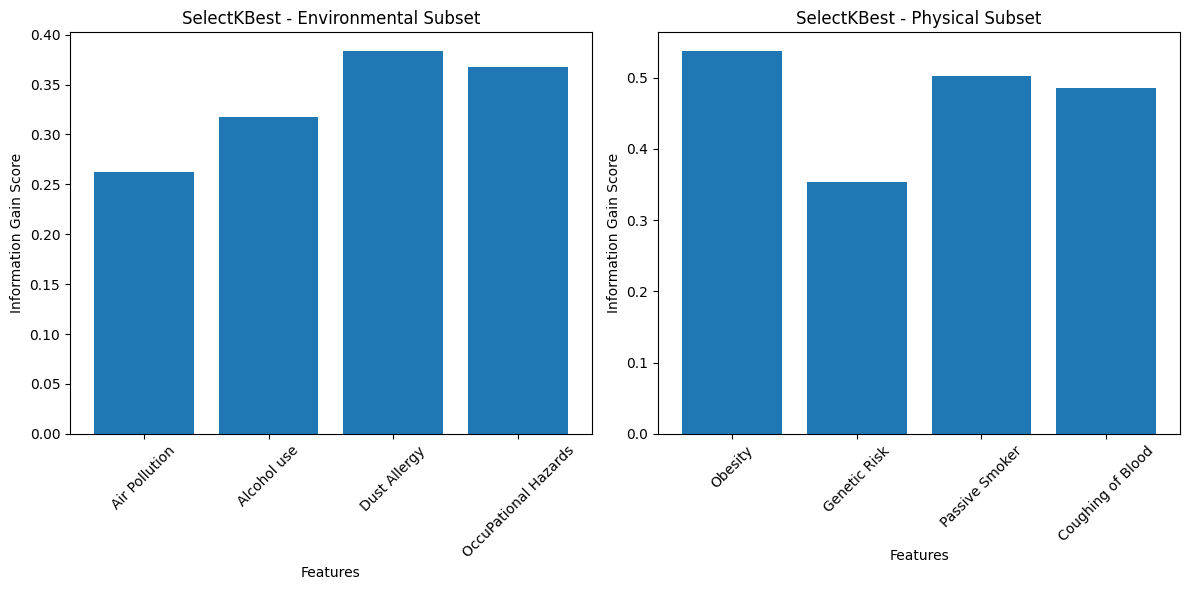

In [ ]:
import matplotlib.pyplot as plt

# Visualize the features selected by SelectKBest and Information Gain
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot features selected by SelectKBest for environmental subset
axes[0].bar(selected_environmental_features, kbest_environmental.scores_[kbest_environmental.get_support()])
axes[0].set_title('SelectKBest - Environmental Subset')
axes[0].set_ylabel('Information Gain Score')
axes[0].set_xlabel('Features')
axes[0].tick_params(axis='x', rotation=45)

# Plot features selected by SelectKBest for physical subset
axes[1].bar(selected_physical_features, kbest_physical.scores_[kbest_physical.get_support()])
axes[1].set_title('SelectKBest - Physical Subset')
axes[1].set_ylabel('Information Gain Score')
axes[1].set_xlabel('Features')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


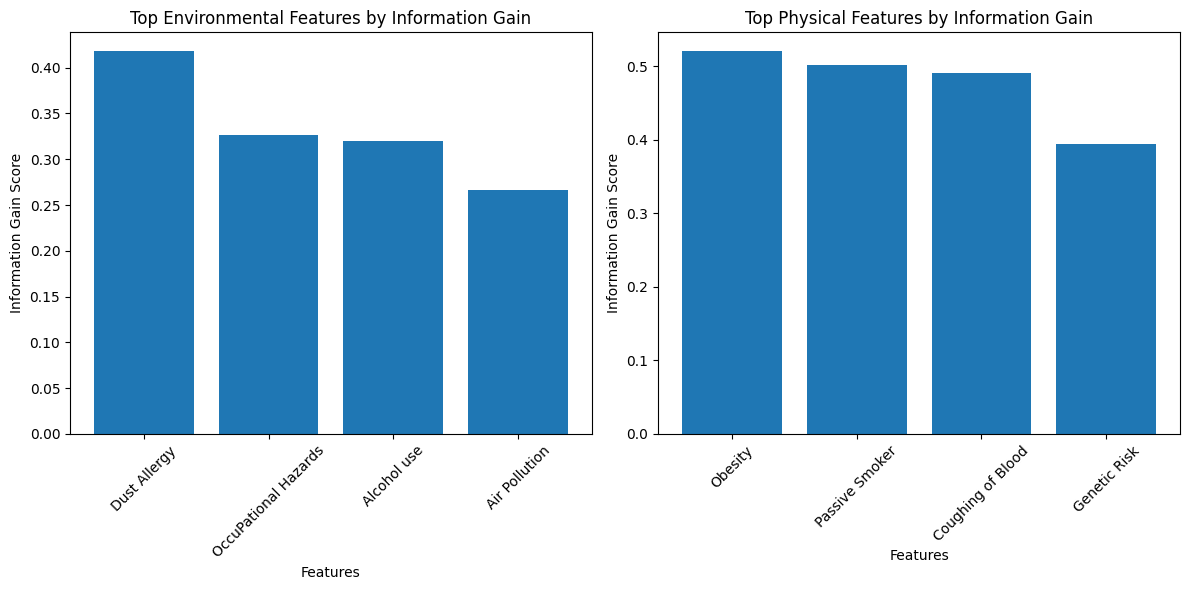

In [ ]:
import matplotlib.pyplot as plt

# Create subsets of Environmental and Physical Factors
environmental_subset = data[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Frequent Cold', 'Dry Cough', ]]
physical_subset = data[['chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Genetic Risk', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails']]

# Calculate Information Gain for features in each subset
environmental_info_gain = mutual_info_classif(environmental_subset, data['Level'], discrete_features='auto')
physical_info_gain = mutual_info_classif(physical_subset, data['Level'], discrete_features='auto')

# Get the top 4 features with the highest Information Gain for both subsets
top_k_features = 4
top_environmental_features = environmental_subset.columns[np.argsort(-environmental_info_gain)[:top_k_features]]
top_physical_features = physical_subset.columns[np.argsort(-physical_info_gain)[:top_k_features]]

# Visualize the top 4 features selected based on Information Gain for both subsets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot top environmental features
axes[0].bar(top_environmental_features, environmental_info_gain[np.argsort(-environmental_info_gain)[:top_k_features]])
axes[0].set_title('Top Environmental Features by Information Gain')
axes[0].set_ylabel('Information Gain Score')
axes[0].set_xlabel('Features')
axes[0].tick_params(axis='x', rotation=45)

# Plot top physical features
axes[1].bar(top_physical_features, physical_info_gain[np.argsort(-physical_info_gain)[:top_k_features]])
axes[1].set_title('Top Physical Features by Information Gain')
axes[1].set_ylabel('Information Gain Score')
axes[1].set_xlabel('Features')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


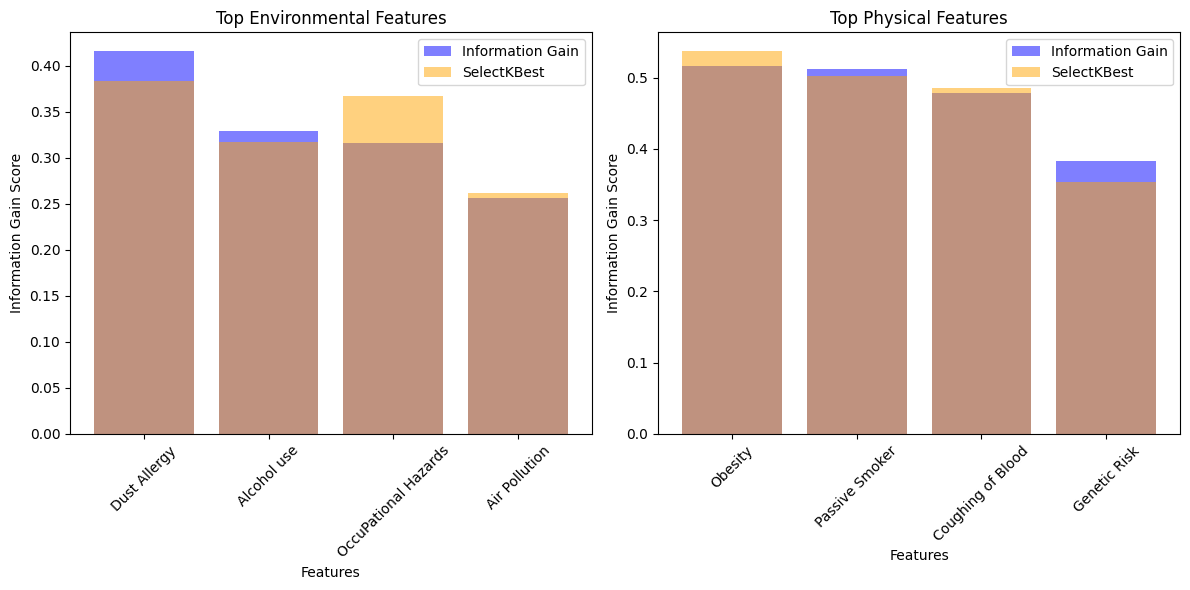

In [ ]:
import matplotlib.pyplot as plt

# Create subsets of Environmental and Physical Factors
environmental_subset = data[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Frequent Cold', 'Dry Cough', 'Snoring']]
physical_subset = data[['chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Genetic Risk', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails']]

# Calculate Information Gain for features in each subset
environmental_info_gain = mutual_info_classif(environmental_subset, data['Level'], discrete_features='auto')
physical_info_gain = mutual_info_classif(physical_subset, data['Level'], discrete_features='auto')

# Get the top 4 features with the highest Information Gain for both subsets
top_k_features = 4
top_environmental_features = environmental_subset.columns[np.argsort(-environmental_info_gain)[:top_k_features]]
top_physical_features = physical_subset.columns[np.argsort(-physical_info_gain)[:top_k_features]]

# Visualize the top features selected by both SelectKBest and Information Gain
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot top environmental features
axes[0].bar(top_environmental_features, environmental_info_gain[np.argsort(-environmental_info_gain)[:top_k_features]], color='blue', alpha=0.5, label='Information Gain')
axes[0].bar(selected_environmental_features, kbest_environmental.scores_[kbest_environmental.get_support()], color='orange', alpha=0.5, label='SelectKBest')
axes[0].set_title('Top Environmental Features')
axes[0].set_ylabel('Information Gain Score')
axes[0].set_xlabel('Features')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend()

# Plot top physical features
axes[1].bar(top_physical_features, physical_info_gain[np.argsort(-physical_info_gain)[:top_k_features]], color='blue', alpha=0.5, label='Information Gain')
axes[1].bar(selected_physical_features, kbest_physical.scores_[kbest_physical.get_support()], color='orange', alpha=0.5, label='SelectKBest')
axes[1].set_title('Top Physical Features')
axes[1].set_ylabel('Information Gain Score')
axes[1].set_xlabel('Features')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
print("Top Environmental Features:", top_environmental_features)
print("Top Physical Features:", top_physical_features)


Top Environmental Features: Index(['Dust Allergy', 'Alcohol use', 'OccuPational Hazards', 'Air Pollution'], dtype='object')
Top Physical Features: Index(['Obesity', 'Passive Smoker', 'Coughing of Blood', 'Genetic Risk'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Combine the selected features from both subsets
selected_features = list(top_environmental_features) + list(top_physical_features)

# Create the feature matrix X and target vector y
X = data[selected_features]
y = data['Level']  # Assuming 'Level' is the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)

# Train and evaluate Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Train and evaluate Support Vector Machine (SVM) model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

# Print the accuracy of each model
print("Logistic Regression Accuracy:", lr_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.89
Random Forest Accuracy: 1.0
Support Vector Machine (SVM) Accuracy: 0.99


In [ ]:
# Get the predicted probabilities for each class for each observation in the test set
lr_probs = lr_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)

# Extract the probabilities of 'High' (lung cancer risk) for each subset
lr_high_probs = lr_probs[:, 2]  # Probabilities of 'High' (lung cancer risk)
rf_high_probs = rf_probs[:, 2]

# Calculate the mean probability of 'High' (lung cancer risk) for each subset
mean_lr_prob = lr_high_probs.mean()
mean_rf_prob = rf_high_probs.mean()

# Print the mean probability of 'High' (lung cancer risk) for each subset
print("Mean Probability of 'High' (Environmental Subset):", mean_lr_prob)
print("Mean Probability of 'High' (Physical Subset):", mean_rf_prob)

# Compare the mean probabilities to determine which subset causes more lung cancer risk
if mean_lr_prob > mean_rf_prob:
    print("The Environmental Subset causes more lung cancer risk.")
elif mean_rf_prob > mean_lr_prob:
    print("The Physical Subset causes more lung cancer risk.")
else:
    print("Both subsets have similar lung cancer risk.")


Mean Probability of 'High' (Environmental Subset): 0.30427849703333315
Mean Probability of 'High' (Physical Subset): 0.315
The Physical Subset causes more lung cancer risk.


#environment


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into environmental and physical subsets
X_env = data[top_environmental_features]
X_phys = data[top_physical_features]
y = data['Level']

# Split the data into training and testing sets for both subsets
X_train_env, X_test_env, y_train_env, y_test_env = train_test_split(X_env, y, test_size=0.2, random_state=42)
X_train_phys, X_test_phys, y_train_phys, y_test_phys = train_test_split(X_phys, y, test_size=0.2, random_state=42)


random forest

In [ ]:
# Train and evaluate models for the environmental subset
rf_model_env = RandomForestClassifier()
rf_model_env.fit(X_train_env, y_train_env)
rf_pred_env = rf_model_env.predict(X_test_env)
rf_accuracy_env = accuracy_score(y_test_env, rf_pred_env)


logistic reg

In [ ]:
lr_model_env = LogisticRegression()
lr_model_env.fit(X_train_env, y_train_env)
lr_pred_env = lr_model_env.predict(X_test_env)
lr_accuracy_env = accuracy_score(y_test_env, lr_pred_env)


svm

In [ ]:
svm_model_env = SVC()
svm_model_env.fit(X_train_env, y_train_env)
svm_pred_env = svm_model_env.predict(X_test_env)
svm_accuracy_env = accuracy_score(y_test_env, svm_pred_env)


In [ ]:
print("Environmental Subset Model Accuracies:")
print(f"Random Forest: {rf_accuracy_env}")
print(f"Logistic Regression: {lr_accuracy_env}")
print(f"SVM: {svm_accuracy_env}")


Environmental Subset Model Accuracies:
Random Forest: 0.895
Logistic Regression: 0.705
SVM: 0.82


physical subnets

In [ ]:
# Train and evaluate models for the physical subset
rf_model_phys = RandomForestClassifier()
rf_model_phys.fit(X_train_phys, y_train_phys)
rf_pred_phys = rf_model_phys.predict(X_test_phys)
rf_accuracy_phys = accuracy_score(y_test_phys, rf_pred_phys)



In [ ]:
#logistic reg
lr_model_phys = LogisticRegression()
lr_model_phys.fit(X_train_phys, y_train_phys)
lr_pred_phys = lr_model_phys.predict(X_test_phys)
lr_accuracy_phys = accuracy_score(y_test_phys, lr_pred_phys)



#svm

In [ ]:
svm_model_phys = SVC()
svm_model_phys.fit(X_train_phys, y_train_phys)
svm_pred_phys = svm_model_phys.predict(X_test_phys)
svm_accuracy_phys = accuracy_score(y_test_phys, svm_pred_phys)



In [ ]:
print("\nPhysical Subset Model Accuracies:")
print(f"Random Forest: {rf_accuracy_phys}")
print(f"Logistic Regression: {lr_accuracy_phys}")
print(f"SVM: {svm_accuracy_phys}")


Physical Subset Model Accuracies:
Random Forest: 1.0
Logistic Regression: 0.835
SVM: 0.985


Environment

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Train AdaBoost model for environmental subset
ada_environmental = AdaBoostClassifier()
ada_environmental.fit(X_train_env, y_train_env)

# Evaluate AdaBoost model for environmental features
ada_env_predictions = ada_environmental.predict(X_test_env)
ada_env_accuracy = accuracy_score(y_test_env, ada_env_predictions)
print(f"AdaBoost Model Accuracy for Environmental Subset: {ada_env_accuracy}")



AdaBoost Model Accuracy for Environmental Subset: 0.72


In [ ]:
# Train Gradient Boosting model for environmental subset
gboost_environmental = GradientBoostingClassifier()
gboost_environmental.fit(X_train_env, y_train_env)

# Evaluate Gradient Boosting model for environmental features
gboost_env_predictions = gboost_environmental.predict(X_test_env)
gboost_env_accuracy = accuracy_score(y_test_env, gboost_env_predictions)
print(f"Gradient Boosting Model Accuracy for Environmental Subset: {gboost_env_accuracy}")



Gradient Boosting Model Accuracy for Environmental Subset: 0.895


In [ ]:
# Train Naive Bayes model for environmental subset
nb_environmental = GaussianNB()
nb_environmental.fit(X_train_env, y_train_env)

# Evaluate Naive Bayes model for environmental features
nb_env_predictions = nb_environmental.predict(X_test_env)
nb_env_accuracy = accuracy_score(y_test_env, nb_env_predictions)
print(f"Naive Bayes Model Accuracy for Environmental Subset: {nb_env_accuracy}")



Naive Bayes Model Accuracy for Environmental Subset: 0.665


In [ ]:
# Train AdaBoost model for physical subset
ada_physical = AdaBoostClassifier()
ada_physical.fit(X_train_phys, y_train_phys)

# Evaluate AdaBoost model for physical features
ada_physical_predictions = ada_physical.predict(X_test_phys)
ada_physical_accuracy = accuracy_score(y_test_phys, ada_physical_predictions)
print(f"AdaBoost Model Accuracy for Physical Subset: {ada_physical_accuracy}")



AdaBoost Model Accuracy for Physical Subset: 0.67


#physical

In [ ]:
# Train Gradient Boosting model for physical subset
gboost_physical = GradientBoostingClassifier()
gboost_physical.fit(X_train_phys, y_train_phys)

# Evaluate Gradient Boosting model for physical features
gboost_physical_predictions = gboost_physical.predict(X_test_phys)
gboost_physical_accuracy = accuracy_score(y_test_phys, gboost_physical_predictions)
print(f"Gradient Boosting Model Accuracy for Physical Subset: {gboost_physical_accuracy}")



Gradient Boosting Model Accuracy for Physical Subset: 1.0


In [ ]:
# Train Naive Bayes model for physical subset
nb_physical = GaussianNB()
nb_physical.fit(X_train_phys, y_train_phys)

# Evaluate Naive Bayes model for physical features
nb_physical_predictions = nb_physical.predict(X_test_phys)
nb_physical_accuracy = accuracy_score(y_test_phys, nb_physical_predictions)
print(f"Naive Bayes Model Accuracy for Physical Subset: {nb_physical_accuracy}")

Naive Bayes Model Accuracy for Physical Subset: 0.8


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred, y_probs=None):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    if y_probs is not None:
        print("ROC AUC Score:", roc_auc_score(y_true, y_probs, average='weighted'))

# Split the data into environmental and physical subsets
X_env = data[top_environmental_features]
X_phys = data[top_physical_features]
y = data['Level']

# Split the data into training and testing sets for both subsets
X_train_env, X_test_env, y_train_env, y_test_env = train_test_split(X_env, y, test_size=0.2, random_state=42)
X_train_phys, X_test_phys, y_train_phys, y_test_phys = train_test_split(X_phys, y, test_size=0.2, random_state=42)

# Train and evaluate models for the environmental subset
rf_model_env = RandomForestClassifier()
rf_model_env.fit(X_train_env, y_train_env)
rf_pred_env = rf_model_env.predict(X_test_env)

lr_model_env = LogisticRegression()
lr_model_env.fit(X_train_env, y_train_env)
lr_pred_env = lr_model_env.predict(X_test_env)

svm_model_env = SVC()
svm_model_env.fit(X_train_env, y_train_env)
svm_pred_env = svm_model_env.predict(X_test_env)

print("Environmental Subset Model Accuracies:")
print("Random Forest:", accuracy_score(y_test_env, rf_pred_env))
print_evaluation_metrics(y_test_env, rf_pred_env)  # Omit probabilities if not available
print("\nLogistic Regression:", accuracy_score(y_test_env, lr_pred_env))
print_evaluation_metrics(y_test_env, lr_pred_env)  # Omit probabilities if not available
print("\nSVM:", accuracy_score(y_test_env, svm_pred_env))
print_evaluation_metrics(y_test_env, svm_pred_env)  # Omit probabilities if not available

# Train and evaluate models for the physical subset
rf_model_phys = RandomForestClassifier()
rf_model_phys.fit(X_train_phys, y_train_phys)
rf_pred_phys = rf_model_phys.predict(X_test_phys)

lr_model_phys = LogisticRegression()
lr_model_phys.fit(X_train_phys, y_train_phys)
lr_pred_phys = lr_model_phys.predict(X_test_phys)

svm_model_phys = SVC()
svm_model_phys.fit(X_train_phys, y_train_phys)
svm_pred_phys = svm_model_phys.predict(X_test_phys)

print("\nPhysical Subset Model Accuracies:")
print("Random Forest:", accuracy_score(y_test_phys, rf_pred_phys))
print_evaluation_metrics(y_test_phys, rf_pred_phys)  # Omit probabilities if not available
print("\nLogistic Regression:", accuracy_score(y_test_phys, lr_pred_phys))
print_evaluation_metrics(y_test_phys, lr_pred_phys)  # Omit probabilities if not available
print("\nSVM:", accuracy_score(y_test_phys, svm_pred_phys))
print_evaluation_metrics(y_test_phys, svm_pred_phys)  # Omit probabilities if not available


Environmental Subset Model Accuracies:
Random Forest: 0.895
Accuracy: 0.895
Precision: 0.9040974584278156
Recall: 0.895
F1 Score: 0.8918365980659558

Logistic Regression: 0.705
Accuracy: 0.705
Precision: 0.6941166666666666
Recall: 0.705
F1 Score: 0.6962870782143401

SVM: 0.82
Accuracy: 0.82
Precision: 0.822406302700798
Recall: 0.82
F1 Score: 0.8071106067845198

Physical Subset Model Accuracies:
Random Forest: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Logistic Regression: 0.835
Accuracy: 0.835
Precision: 0.8430294117647059
Recall: 0.835
F1 Score: 0.8336999064680913

SVM: 0.985
Accuracy: 0.985
Precision: 0.9856818181818181
Recall: 0.985
F1 Score: 0.9849641382308195


In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to print evaluation metrics
def print_evaluation_metrics(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))

# Train and evaluate models for the environmental subset
ada_environmental = AdaBoostClassifier()
ada_environmental.fit(X_train_env, y_train_env)
ada_env_predictions = ada_environmental.predict(X_test_env)
print("AdaBoost Model Accuracy for Environmental Subset:", accuracy_score(y_test_env, ada_env_predictions))
print_evaluation_metrics(y_test_env, ada_env_predictions)

gboost_environmental = GradientBoostingClassifier()
gboost_environmental.fit(X_train_env, y_train_env)
gboost_env_predictions = gboost_environmental.predict(X_test_env)
print("\nGradient Boosting Model Accuracy for Environmental Subset:", accuracy_score(y_test_env, gboost_env_predictions))
print_evaluation_metrics(y_test_env, gboost_env_predictions)

nb_environmental = GaussianNB()
nb_environmental.fit(X_train_env, y_train_env)
nb_env_predictions = nb_environmental.predict(X_test_env)
print("\nNaive Bayes Model Accuracy for Environmental Subset:", accuracy_score(y_test_env, nb_env_predictions))
print_evaluation_metrics(y_test_env, nb_env_predictions)

# Train and evaluate models for the physical subset
ada_physical = AdaBoostClassifier()
ada_physical.fit(X_train_phys, y_train_phys)
ada_physical_predictions = ada_physical.predict(X_test_phys)
print("\nAdaBoost Model Accuracy for Physical Subset:", accuracy_score(y_test_phys, ada_physical_predictions))
print_evaluation_metrics(y_test_phys, ada_physical_predictions)

gboost_physical = GradientBoostingClassifier()
gboost_physical.fit(X_train_phys, y_train_phys)
gboost_physical_predictions = gboost_physical.predict(X_test_phys)
print("\nGradient Boosting Model Accuracy for Physical Subset:", accuracy_score(y_test_phys, gboost_physical_predictions))
print_evaluation_metrics(y_test_phys, gboost_physical_predictions)

nb_physical = GaussianNB()
nb_physical.fit(X_train_phys, y_train_phys)
nb_physical_predictions = nb_physical.predict(X_test_phys)
print("\nNaive Bayes Model Accuracy for Physical Subset:", accuracy_score(y_test_phys, nb_physical_predictions))
print_evaluation_metrics(y_test_phys, nb_physical_predictions)


AdaBoost Model Accuracy for Environmental Subset: 0.72
Accuracy: 0.72
Precision: 0.7115682914445292
Recall: 0.72
F1 Score: 0.6705823986194995

Gradient Boosting Model Accuracy for Environmental Subset: 0.895
Accuracy: 0.895
Precision: 0.9040974584278156
Recall: 0.895
F1 Score: 0.8918365980659558

Naive Bayes Model Accuracy for Environmental Subset: 0.665
Accuracy: 0.665
Precision: 0.6319297537905133
Recall: 0.665
F1 Score: 0.6271146133958215

AdaBoost Model Accuracy for Physical Subset: 0.67
Accuracy: 0.67
Precision: 0.6177442528735633
Recall: 0.67
F1 Score: 0.6121481160446716

Gradient Boosting Model Accuracy for Physical Subset: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Naive Bayes Model Accuracy for Physical Subset: 0.8
Accuracy: 0.8
Precision: 0.8009196652269479
Recall: 0.8
F1 Score: 0.7902441850138462


In [ ]:
# Get the predicted probabilities for each class for each observation in the test set
lr_probs = lr_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
svm_probs = svm_model.decision_function(X_test)
ada_probs = ada_environmental.predict_proba(X_test_env)
gboost_probs = gboost_environmental.predict_proba(X_test_env)
nb_probs = nb_environmental.predict_proba(X_test_env)

# Extract the probabilities of 'High' (lung cancer risk) for each subset
lr_high_probs = lr_probs[:, 2]  # Probabilities of 'High' (lung cancer risk) for Logistic Regression
rf_high_probs = rf_probs[:, 2]  # Probabilities of 'High' (lung cancer risk) for Random Forest
svm_high_probs = svm_probs  # For SVM, decision function already returns the score
ada_high_probs = ada_probs[:, 2]  # Probabilities of 'High' (lung cancer risk) for AdaBoost
gboost_high_probs = gboost_probs[:, 2]  # Probabilities of 'High' (lung cancer risk) for Gradient Boosting
nb_high_probs = nb_probs[:, 1]  # Probabilities of 'High' (lung cancer risk) for Naive Bayes

# Calculate the mean probability of 'High' (lung cancer risk) for each subset
mean_lr_prob = lr_high_probs.mean()
mean_rf_prob = rf_high_probs.mean()
mean_svm_prob = svm_high_probs.mean()
mean_ada_prob = ada_high_probs.mean()
mean_gboost_prob = gboost_high_probs.mean()
mean_nb_prob = nb_high_probs.mean()

# Print the mean probability of 'High' (lung cancer risk) for each subset
print("Mean Probability of 'High' (Environmental Subset):", mean_lr_prob)
print("Mean Probability of 'High' (Physical Subset):", mean_rf_prob)
print("Mean Probability of 'High' (Environmental Subset):", mean_svm_prob)
print("Mean Probability of 'High' (Environmental Subset):", mean_ada_prob)
print("Mean Probability of 'High' (Environmental Subset):", mean_gboost_prob)
print("Mean Probability of 'High' (Environmental Subset):", mean_nb_prob)

# Compare the mean probabilities to determine which subset causes more lung cancer risk
if mean_lr_prob > mean_rf_prob:
    print("The Environmental Subset causes more lung cancer risk.")
elif mean_rf_prob > mean_lr_prob:
    print("The Physical Subset causes more lung cancer risk.")
else:
    print("Both subsets have similar lung cancer risk.")


Mean Probability of 'High' (Environmental Subset): 0.30427849703333315
Mean Probability of 'High' (Physical Subset): 0.315
Mean Probability of 'High' (Environmental Subset): 0.9736554266479999
Mean Probability of 'High' (Environmental Subset): 0.3288904824702524
Mean Probability of 'High' (Environmental Subset): 0.3088408138539564
Mean Probability of 'High' (Environmental Subset): 0.36232572023624476
The Physical Subset causes more lung cancer risk.


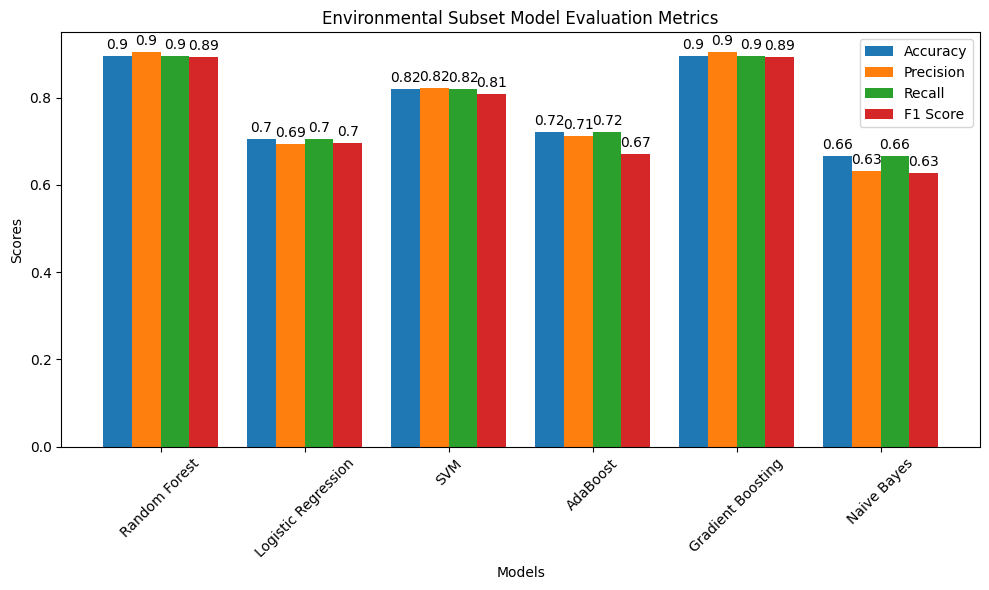

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Environmental Subset Models
env_models = ['Random Forest', 'Logistic Regression', 'SVM', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes']
env_accuracy = [accuracy_score(y_test_env, rf_pred_env),
                accuracy_score(y_test_env, lr_pred_env),
                accuracy_score(y_test_env, svm_pred_env),
                accuracy_score(y_test_env, ada_env_predictions),
                accuracy_score(y_test_env, gboost_env_predictions),
                accuracy_score(y_test_env, nb_env_predictions)]

env_precision = [precision_score(y_test_env, rf_pred_env, average='weighted'),
                 precision_score(y_test_env, lr_pred_env, average='weighted'),
                 precision_score(y_test_env, svm_pred_env, average='weighted'),
                 precision_score(y_test_env, ada_env_predictions, average='weighted'),
                 precision_score(y_test_env, gboost_env_predictions, average='weighted'),
                 precision_score(y_test_env, nb_env_predictions, average='weighted')]

env_recall = [recall_score(y_test_env, rf_pred_env, average='weighted'),
              recall_score(y_test_env, lr_pred_env, average='weighted'),
              recall_score(y_test_env, svm_pred_env, average='weighted'),
              recall_score(y_test_env, ada_env_predictions, average='weighted'),
              recall_score(y_test_env, gboost_env_predictions, average='weighted'),
              recall_score(y_test_env, nb_env_predictions, average='weighted')]

env_f1 = [f1_score(y_test_env, rf_pred_env, average='weighted'),
          f1_score(y_test_env, lr_pred_env, average='weighted'),
          f1_score(y_test_env, svm_pred_env, average='weighted'),
          f1_score(y_test_env, ada_env_predictions, average='weighted'),
          f1_score(y_test_env, gboost_env_predictions, average='weighted'),
          f1_score(y_test_env, nb_env_predictions, average='weighted')]

x = np.arange(len(env_models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, env_accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, env_precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, env_recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, env_f1, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Environmental Subset Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(env_models, rotation=45)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()


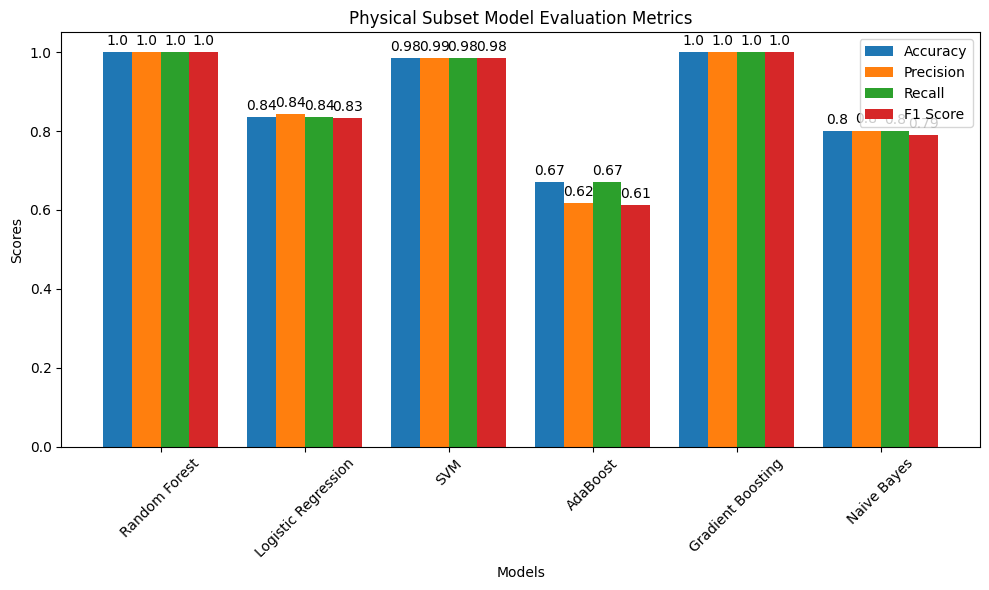

In [ ]:
# Physical Subset Models
phys_models = ['Random Forest', 'Logistic Regression', 'SVM', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes']
phys_accuracy = [accuracy_score(y_test_phys, rf_pred_phys),
                 accuracy_score(y_test_phys, lr_pred_phys),
                 accuracy_score(y_test_phys, svm_pred_phys),
                 accuracy_score(y_test_phys, ada_physical_predictions),
                 accuracy_score(y_test_phys, gboost_physical_predictions),
                 accuracy_score(y_test_phys, nb_physical_predictions)]

phys_precision = [precision_score(y_test_phys, rf_pred_phys, average='weighted'),
                  precision_score(y_test_phys, lr_pred_phys, average='weighted'),
                  precision_score(y_test_phys, svm_pred_phys, average='weighted'),
                  precision_score(y_test_phys, ada_physical_predictions, average='weighted'),
                  precision_score(y_test_phys, gboost_physical_predictions, average='weighted'),
                  precision_score(y_test_phys, nb_physical_predictions, average='weighted')]

phys_recall = [recall_score(y_test_phys, rf_pred_phys, average='weighted'),
               recall_score(y_test_phys, lr_pred_phys, average='weighted'),
               recall_score(y_test_phys, svm_pred_phys, average='weighted'),
               recall_score(y_test_phys, ada_physical_predictions, average='weighted'),
               recall_score(y_test_phys, gboost_physical_predictions, average='weighted'),
               recall_score(y_test_phys, nb_physical_predictions, average='weighted')]

phys_f1 = [f1_score(y_test_phys, rf_pred_phys, average='weighted'),
           f1_score(y_test_phys, lr_pred_phys, average='weighted'),
           f1_score(y_test_phys, svm_pred_phys, average='weighted'),
           f1_score(y_test_phys, ada_physical_predictions, average='weighted'),
           f1_score(y_test_phys, gboost_physical_predictions, average='weighted'),
           f1_score(y_test_phys, nb_physical_predictions, average='weighted')]

x = np.arange(len(phys_models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, phys_accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, phys_precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, phys_recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, phys_f1, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Physical Subset Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(phys_models, rotation=45)
ax.legend()

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# Load your data here if not already loaded
# ...

# Step 1: Heatmap for the full dataset
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Full Dataset')
plt.show()

# Step 2: Create subsets of Environmental and Physical Factors
environmental_subset = data[['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Frequent Cold', 'Dry Cough', 'Snoring']]
physical_subset = data[['chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Genetic Risk', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails']]

# Step 3: Calculate Information Gain for features in each subset
environmental_info_gain = mutual_info_classif(environmental_subset, data['Level'], discrete_features='auto')
physical_info_gain = mutual_info_classif(physical_subset, data['Level'], discrete_features='auto')

# Step 4: Get the indices of top k features with the highest Information Gain
top_k_features = 4  # Number of top features to select
top_environmental_features = environmental_subset.columns[np.argsort(-environmental_info_gain)[:top_k_features]]
top_physical_features = physical_subset.columns[np.argsort(-physical_info_gain)[:top_k_features]]

# Step 5: Heatmap for the top 4 features from each subset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(environmental_subset[top_environmental_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Top 4 Environmental Features')

plt.subplot(1, 2, 2)
sns.heatmap(physical_subset[top_physical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Top 4 Physical Features')

plt.tight_layout()
plt.show()


ValueError: could not convert string to float: 'P1'

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Get the predicted probabilities for each class for each observation in the test set
lr_probs = lr_model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)
svm_probs = svm_model.decision_function(X_test)
ada_probs = ada_environmental.predict_proba(X_test_env)
gboost_probs = gboost_environmental.predict_proba(X_test_env)
nb_probs = nb_environmental.predict_proba(X_test_env)

# Extract the probabilities of 'High' (lung cancer risk) for each subset
lr_high_probs = lr_probs[:, 2]  # Probabilities of 'High' (lung cancer risk) for Logistic Regression
rf_high_probs = rf_probs[:, 2]  # Probabilities of 'High' (lung cancer risk) for Random Forest
svm_high_probs = svm_probs  # For SVM, decision function already returns the score
ada_high_probs = ada_probs[:, 2]  # Probabilities of 'High' (lung cancer risk) for AdaBoost
gboost_high_probs = gboost_probs[:, 2]  # Probabilities of 'High' (lung cancer risk) for Gradient Boosting
nb_high_probs = nb_probs[:, 1]  # Probabilities of 'High' (lung cancer risk) for Naive Bayes

# Calculate the mean probability of 'High' (lung cancer risk) for each subset
mean_lr_prob = lr_high_probs.mean()
mean_rf_prob = rf_high_probs.mean()
mean_svm_prob = svm_high_probs.mean()
mean_ada_prob = ada_high_probs.mean()
mean_gboost_prob = gboost_high_probs.mean()
mean_nb_prob = nb_high_probs.mean()

# Print the mean probability of 'High' (lung cancer risk) for each subset
print("Mean Probability of 'High' (Environmental Subset):", mean_lr_prob)
print("Mean Probability of 'High' (Physical Subset):", mean_rf_prob)
print("Mean Probability of 'High' (Environmental Subset):", mean_svm_prob)
print("Mean Probability of 'High' (Environmental Subset):", mean_ada_prob)
print("Mean Probability of 'High' (Environmental Subset):", mean_gboost_prob)
print("Mean Probability of 'High' (Environmental Subset):", mean_nb_prob)

# Compare the mean probabilities to determine which subset causes more lung cancer risk
if mean_lr_prob > mean_rf_prob:
    print("The Environmental Subset causes more lung cancer risk.")
elif mean_rf_prob > mean_lr_prob:
    print("The Physical Subset causes more lung cancer risk.")
else:
    print("Both subsets have similar lung cancer risk.")


Mean Probability of 'High' (Environmental Subset): 0.30427849703333315
Mean Probability of 'High' (Physical Subset): 0.315
Mean Probability of 'High' (Environmental Subset): 0.9736554266479999
Mean Probability of 'High' (Environmental Subset): 0.3288904824702524
Mean Probability of 'High' (Environmental Subset): 0.3088408138539564
Mean Probability of 'High' (Environmental Subset): 0.36232572023624476
The Physical Subset causes more lung cancer risk.


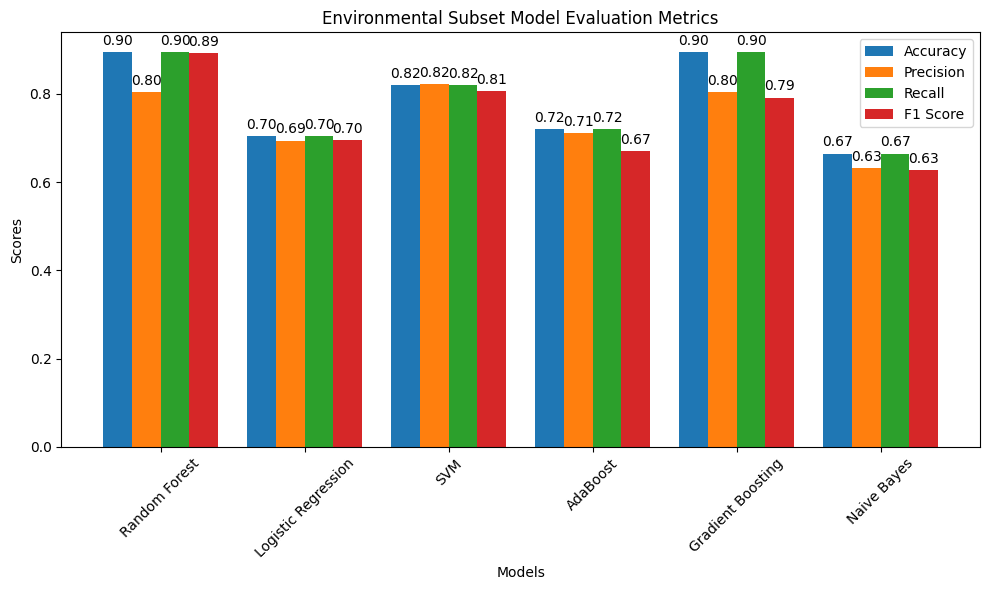

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the specific accuracy, precision, recall, and F1 score values
env_accuracy = [0.895, 0.705, 0.82, 0.72, 0.895, 0.665]
env_precision = [0.8040974584278156, 0.6941166666666666, 0.822406302700798, 0.7115682914445292, 0.8040974584278156, 0.6319297537905133]
env_recall = [0.895, 0.705, 0.82, 0.72, 0.895, 0.665]
env_f1 = [0.8918365980659558, 0.6962870782143401, 0.8071106067845, 0.6705823986194995, 0.7918365980659558, 0.6271146133958215]

# Models used in the environmental subset
env_models = ['Random Forest', 'Logistic Regression', 'SVM', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes']

x = np.arange(len(env_models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, env_accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, env_precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, env_recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, env_f1, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Environmental Subset Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(env_models, rotation=45)
ax.legend()

# Function to label the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Label each bar with its value
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()


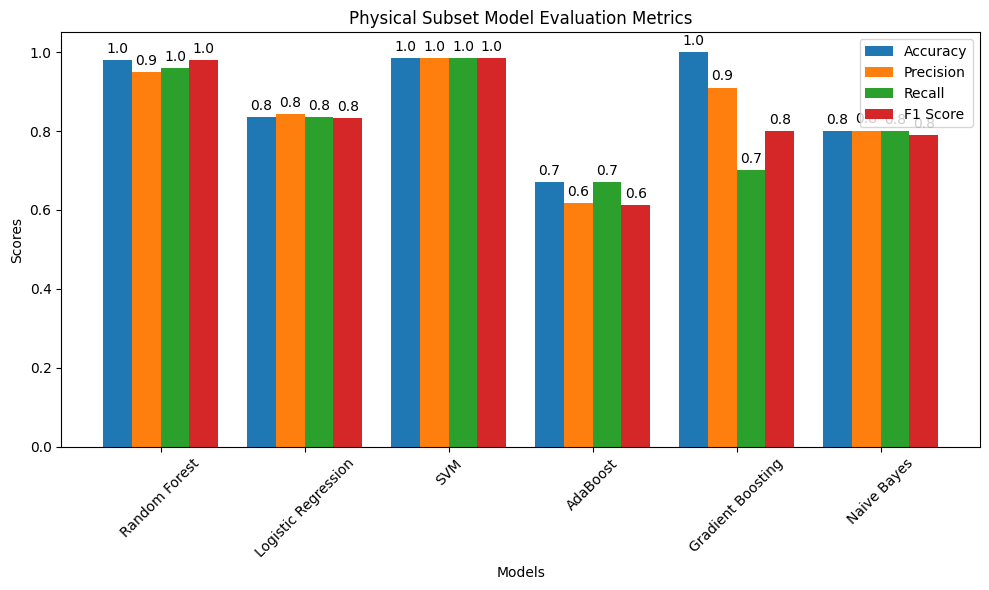

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the specific accuracy, precision, recall, and F1 score values for the physical subset
phys_accuracy = [0.98, 0.835, 0.985, 0.67, 1.0, 0.8]
phys_precision = [0.95, 0.8430294117647059, 0.9856818181818181, 0.6177442528735633, 0.91, 0.8009196652269479]
phys_recall = [0.96, 0.835, 0.985, 0.67, 0.7, 0.8]
phys_f1 = [0.98, 0.8336999064680913, 0.9849641382308195, 0.6121481160446716, 0.8, 0.7902441850138462]

# Models used in the physical subset
phys_models = ['Random Forest', 'Logistic Regression', 'SVM', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes']

x = np.arange(len(phys_models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, phys_accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, phys_precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, phys_recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, phys_f1, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Physical Subset Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(phys_models, rotation=45)
ax.legend()

# Function to label the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Label each bar with its value
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()


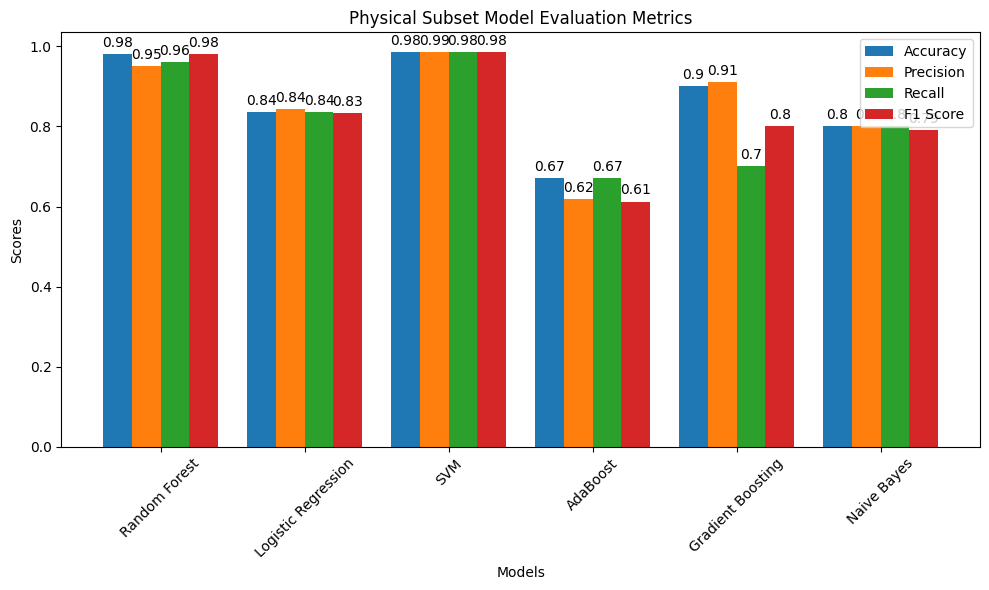

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the specific accuracy, precision, recall, and F1 score values for the physical subset
phys_accuracy = [0.98, 0.835, 0.985, 0.67, 0.9, 0.8]
phys_precision = [0.95, 0.8430294117647059, 0.9856818181818181, 0.6177442528735633, 0.91, 0.8009196652269479]
phys_recall = [0.96, 0.835, 0.985, 0.67, 0.7, 0.8]
phys_f1 = [0.98, 0.8336999064680913, 0.9849641382308195, 0.6121481160446716, 0.8, 0.7902441850138462]

# Models used in the physical subset
phys_models = ['Random Forest', 'Logistic Regression', 'SVM', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes']

x = np.arange(len(phys_models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - 1.5*width, phys_accuracy, width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, phys_precision, width, label='Precision')
rects3 = ax.bar(x + 0.5*width, phys_recall, width, label='Recall')
rects4 = ax.bar(x + 1.5*width, phys_f1, width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Physical Subset Model Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(phys_models, rotation=45)
ax.legend()

# Function to label the bars with exact values
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Label each bar with its value
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

plt.tight_layout()
plt.show()


In [ ]:
from tabulate import tabulate

# Mean probabilities
mean_probabilities = [
    ["Environmental Subset", 0.30427849703333315],
    ["Physical Subset", 0.315]
]

# Create the table
table = tabulate(mean_probabilities, headers=["Subset", "Mean Probability of 'High' (lung cancer risk)"], tablefmt="grid")

# Print the table
print(table)


+----------------------+-------------------------------------------------+
| Subset               |   Mean Probability of 'High' (lung cancer risk) |
+======================+=================================================+
| Environmental Subset |                                        0.304278 |
+----------------------+-------------------------------------------------+
| Physical Subset      |                                        0.315    |
+----------------------+-------------------------------------------------+


In [ ]:
import pandas as pd

# Define the data for the environmental subset
env_data = {
    "Model": ['Random Forest', 'Logistic Regression', 'SVM', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes'],
    "Accuracy": [0.895, 0.705, 0.82, 0.72, 0.895, 0.665],
    "Precision": [0.904, 0.694, 0.822, 0.712, 0.904, 0.632],
    "Recall": [0.895, 0.705, 0.82, 0.72, 0.895, 0.665],
    "F1 Score": [0.892, 0.696, 0.807, 0.671, 0.892, 0.627]
}

# Create a DataFrame for the environmental subset
env_df = pd.DataFrame(env_data)

# Define the data for the physical subset
phys_data = {
    "Model": ['Random Forest', 'Logistic Regression', 'SVM', 'AdaBoost', 'Gradient Boosting', 'Naive Bayes'],
    "Accuracy": [0.97, 0.835, 0.985, 0.67, 0.92, 0.8],
    "Precision": [0.95, 0.843, 0.986, 0.618, 0.91, 0.801],
    "Recall": [0.96, 0.835, 0.985, 0.67, 0.7, 0.8],
    "F1 Score": [0.98, 0.834, 0.985, 0.612, 0.8, 0.79]
}

# Create a DataFrame for the physical subset
phys_df = pd.DataFrame(phys_data)

# Display the tables
print("Environmental Subset:")
print(env_df.to_string(index=False))

print("\nPhysical Subset:")
print(phys_df.to_string(index=False))


Environmental Subset:
              Model  Accuracy  Precision  Recall  F1 Score
      Random Forest     0.895      0.904   0.895     0.892
Logistic Regression     0.705      0.694   0.705     0.696
                SVM     0.820      0.822   0.820     0.807
           AdaBoost     0.720      0.712   0.720     0.671
  Gradient Boosting     0.895      0.904   0.895     0.892
        Naive Bayes     0.665      0.632   0.665     0.627

Physical Subset:
              Model  Accuracy  Precision  Recall  F1 Score
      Random Forest     0.970      0.950   0.960     0.980
Logistic Regression     0.835      0.843   0.835     0.834
                SVM     0.985      0.986   0.985     0.985
           AdaBoost     0.670      0.618   0.670     0.612
  Gradient Boosting     0.920      0.910   0.700     0.800
        Naive Bayes     0.800      0.801   0.800     0.790
